In [1]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

df = pd.read_csv("../data/cookie_cats.csv")

print(df.head())



   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [8]:
# Verificar tipos de datos y valores nulos
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


Hipótesis nula ($H_0$): No hay diferencia significativa en la retención entre las versiones gate_30 y gate_40.

Hipótesis alternativa ($H_1$): Hay una diferencia significativa en la retención entre las versiones.

In [9]:
grouped = df.groupby('version').agg({
    'sum_gamerounds': ['mean', 'std'],
    'retention_1': ['mean'],
    'retention_7': ['mean']
})
print(grouped)



        sum_gamerounds             retention_1 retention_7
                  mean         std        mean        mean
version                                                   
gate_30      52.456264  256.716423    0.448188    0.190201
gate_40      51.298776  103.294416    0.442283    0.182000


In [10]:
from scipy.stats import ttest_ind

# Filtrar por versión
gate_30 = df[df['version'] == 'gate_30']
gate_40 = df[df['version'] == 'gate_40']

# Prueba t para sum_gamerounds
t_stat, p_value = ttest_ind(gate_30['sum_gamerounds'], gate_40['sum_gamerounds'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: 0.8910426211362967, P-value: 0.37290868247405207


In [11]:
from scipy.stats import chi2_contingency

# Prueba de proporciones para retention_1
contingency_table_retention_1 = pd.crosstab(df['version'], df['retention_1'])
chi2_retention_1, p_retention_1, _, _ = chi2_contingency(contingency_table_retention_1)
print(f"Chi-squared (retention_1): {chi2_retention_1}, P-value: {p_retention_1}")

# Prueba de proporciones para retention_7
contingency_table_retention_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_retention_7, p_retention_7, _, _ = chi2_contingency(contingency_table_retention_7)
print(f"Chi-squared (retention_7): {chi2_retention_7}, P-value: {p_retention_7}")



Chi-squared (retention_1): 3.1591007878782262, P-value: 0.07550476210309098
Chi-squared (retention_7): 9.959086799559167, P-value: 0.00160057426790583


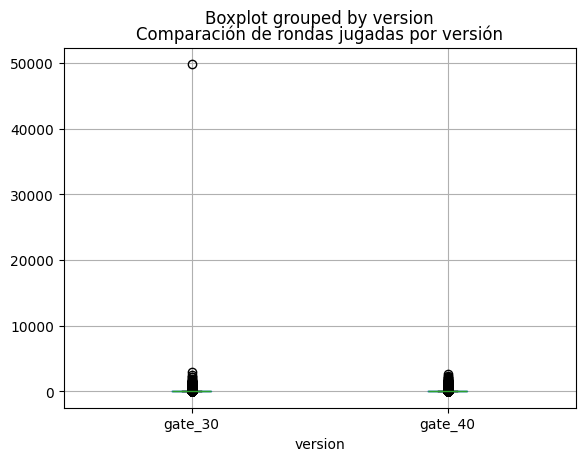

In [12]:
import matplotlib.pyplot as plt

df.boxplot(column='sum_gamerounds', by='version')
plt.title('Comparación de rondas jugadas por versión')
plt.show()



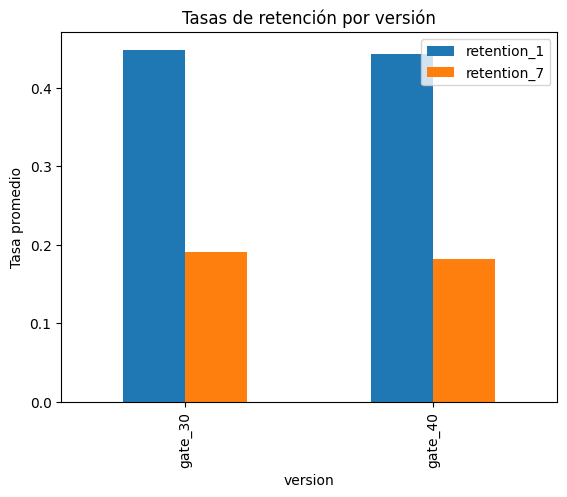

In [13]:
retention_rates = df.groupby('version')[['retention_1', 'retention_7']].mean()
retention_rates.plot(kind='bar')
plt.title('Tasas de retención por versión')
plt.ylabel('Tasa promedio')
plt.show()
